In [8]:
import pandas as pd

# Reloading the dataset with the correct delimiter (semicolon)
berlin_traffic_data = pd.read_csv('/Users/busrayatlav/Desktop/DATA SCIENCE/Berlin_traffic/berlin_traffic_data.csv', delimiter=';')

# Displaying the first few rows to confirm the data structure
berlin_traffic_data.head()


,vehicle_count_per_hour,avg_speed_all_vehicles_kmh,car_count_per_hour,avg_speed_cars_kmh,truck_count_per_hour,avg_speed_trucks_kmh
0,186,72,169,72,17,70
1,123,73,95,73,28,73
2,96,73,68,74,28,72
3,146,75,96,75,50,76
4,230,75,169,75,61,75


Mean Squared Error (MSE): 188.1445124644605
R-squared (R2): 0.2703546054847532


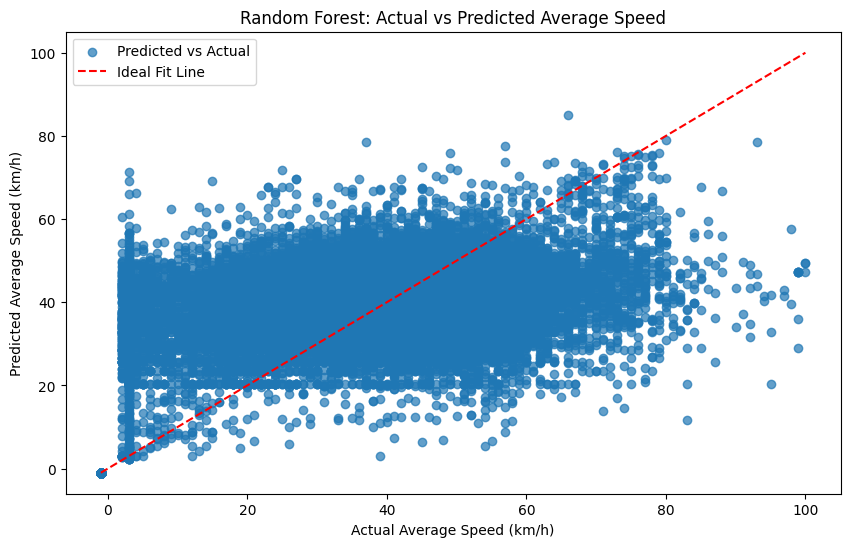

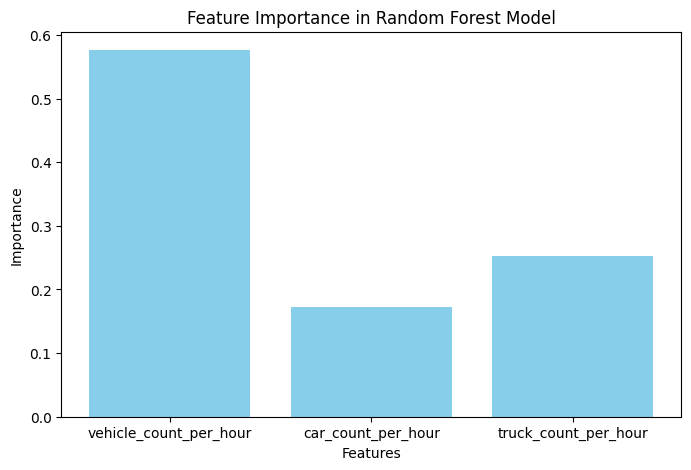

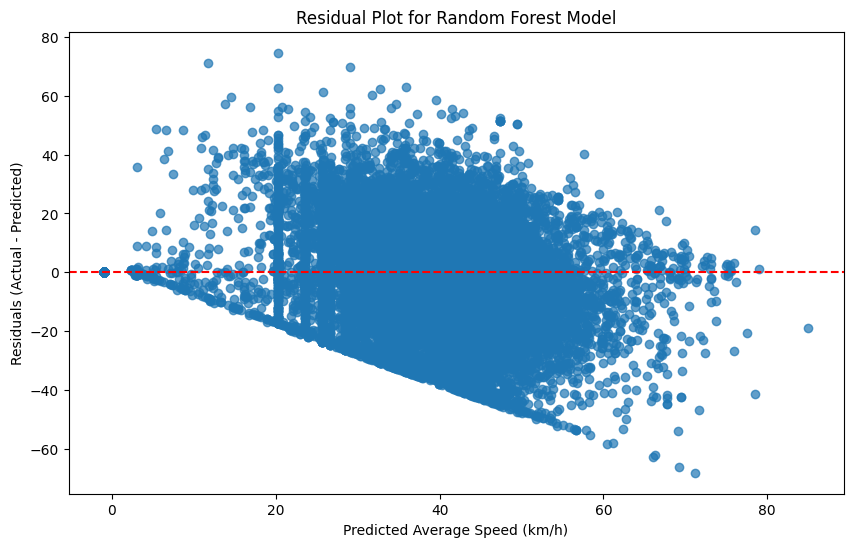

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (independent variables) and target (dependent variable)
X = berlin_traffic_data[['vehicle_count_per_hour', 'car_count_per_hour', 'truck_count_per_hour']]
y = berlin_traffic_data['avg_speed_all_vehicles_kmh']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualization 1: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line')
plt.xlabel("Actual Average Speed (km/h)")
plt.ylabel("Predicted Average Speed (km/h)")
plt.title("Random Forest: Actual vs Predicted Average Speed")
plt.legend()
plt.show()

# Visualization 2: Feature importance
feature_importances = rf_model.feature_importances_
features = ['vehicle_count_per_hour', 'car_count_per_hour', 'truck_count_per_hour']

plt.figure(figsize=(8, 5))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# Visualization 3: Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Average Speed (km/h)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Random Forest Model")
plt.show()
